In [2]:
import pandas as pd
import numpy as np
import pylab as py
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Heart%20Failure%20Prediction/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
data = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time','DEATH_EVENT']]
data["DEATH_EVENT"] = data["DEATH_EVENT"].astype("int")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
data = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time','DEATH_EVENT']]
data["DEATH_EVENT"] = data["DEATH_EVENT"].astype("int")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
X = np.asanyarray(data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']])
X[0:5]

array([[7.5000000e+01, 0.0000000e+00, 5.8200000e+02, 0.0000000e+00,
        2.0000000e+01, 1.0000000e+00, 2.6500000e+05, 1.9000000e+00,
        1.3000000e+02, 1.0000000e+00, 0.0000000e+00, 4.0000000e+00],
       [5.5000000e+01, 0.0000000e+00, 7.8610000e+03, 0.0000000e+00,
        3.8000000e+01, 0.0000000e+00, 2.6335803e+05, 1.1000000e+00,
        1.3600000e+02, 1.0000000e+00, 0.0000000e+00, 6.0000000e+00],
       [6.5000000e+01, 0.0000000e+00, 1.4600000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 1.6200000e+05, 1.3000000e+00,
        1.2900000e+02, 1.0000000e+00, 1.0000000e+00, 7.0000000e+00],
       [5.0000000e+01, 1.0000000e+00, 1.1100000e+02, 0.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 2.1000000e+05, 1.9000000e+00,
        1.3700000e+02, 1.0000000e+00, 0.0000000e+00, 7.0000000e+00],
       [6.5000000e+01, 1.0000000e+00, 1.6000000e+02, 1.0000000e+00,
        2.0000000e+01, 0.0000000e+00, 3.2700000e+05, 2.7000000e+00,
        1.1600000e+02, 0.0000000e+00, 0.0000

In [8]:
y = np.asanyarray(data['DEATH_EVENT'])
y[0:5]

array([1, 1, 1, 1, 1])

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04,
        -8.47579380e-01, -1.53055953e+00,  1.35927151e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00,
        -8.47579380e-01, -7.07675018e-03, -7.35688190e-01,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01,
        -8.47579380e-01, -1.53055953e+00, -7.35688190e-01,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       [-9.12335403e-01,  1.14796753e+00, -4.86071002e-01,
        -8.47579380e-01, -1.53055953e+00, -7.35688190e-01,
        -5.46474088e-01,  4.90056987e-01,  8.50338444e-02,
         7.35688190e-01, -6.87681906e-01, -1.59078490e+00],
       [ 3.50832977e-01,  1.14796753e+00, -4.3548586

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)
print("Train Set:",X_train.shape,y_train.shape)
print("Test Set:",X_test.shape,y_test.shape)

Train Set: (209, 12) (209,)
Test Set: (90, 12) (90,)


In [11]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver = "liblinear").fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [12]:
from sklearn import svm
clf = svm.SVC(kernel="sigmoid")
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)
y_hat[0:5]

array([0, 0, 1, 0, 0])

In [13]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1])

In [14]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57770829, 0.42229171],
       [0.77688292, 0.22311708],
       [0.45368786, 0.54631214],
       [0.57991908, 0.42008092],
       [0.62020134, 0.37979866],
       [0.61828138, 0.38171862],
       [0.65633425, 0.34366575],
       [0.53864965, 0.46135035],
       [0.46001802, 0.53998198],
       [0.74385471, 0.25614529],
       [0.48903493, 0.51096507],
       [0.42313631, 0.57686369],
       [0.43898033, 0.56101967],
       [0.63070574, 0.36929426],
       [0.54086983, 0.45913017],
       [0.71699878, 0.28300122],
       [0.53037668, 0.46962332],
       [0.49870346, 0.50129654],
       [0.73968627, 0.26031373],
       [0.54202527, 0.45797473],
       [0.59847475, 0.40152525],
       [0.43961062, 0.56038938],
       [0.63394998, 0.36605002],
       [0.39392634, 0.60607366],
       [0.5969388 , 0.4030612 ],
       [0.51976676, 0.48023324],
       [0.77375236, 0.22624764],
       [0.55403583, 0.44596417],
       [0.58033969, 0.41966031],
       [0.6823735 , 0.3176265 ],
       [0.

In [15]:
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report
import itertools
def plot_confusion_matrix(cm,classes,
                         normalize = False,
                         title='Confusion Matrix',
                         cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:,np.newaxis]
        print("After Normalization")
    else:
        print("Without Normalization")
    print(cm)
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation = True,color='white')
    plt.yticks(tick_marks,classes,rotation =True,color='white')
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment = "center",
                color = 'white' if cm[i,j]>thresh else "black")
        
    plt.tight_layout()
    plt.xlabel("Predicted",color='white',size=20)
    plt.ylabel("True",color='white',size=20)

In [16]:
from sklearn.metrics import f1_score
f1_score(y_test,yhat,average = "weighted")

0.8425299145299144

In [17]:
f1_score(y_test,y_hat,average = "weighted")

0.8246913580246913

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.75      0.69      0.72        26

    accuracy                           0.84        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90

Without Normalization
[[58  6]
 [ 8 18]]


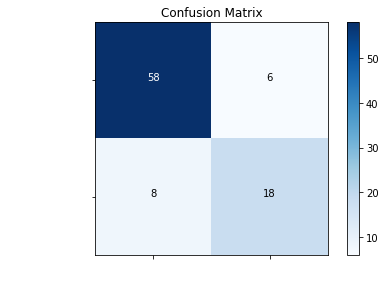

In [18]:
cnf_matrix=confusion_matrix(y_test,yhat,labels=[0,1])
np.set_printoptions(precision = 2)
print(classification_report(y_test,yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Survived(0)','Died(1)'],normalize=False,title='Confusion Matrix')

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.75      0.69      0.72        26

    accuracy                           0.84        90
   macro avg       0.81      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90

Without Normalization
[[60  4]
 [11 15]]


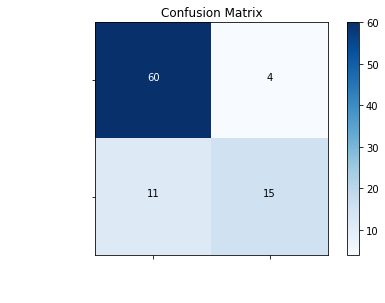

In [19]:
cnf_matrix=confusion_matrix(y_test,y_hat,labels=[0,1])
np.set_printoptions(precision = 2)
print(classification_report(y_test,yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=['Survived(0)','Died(1)'],normalize=False,title='Confusion Matrix')